# Lung X-Ray Database learning - ANN Classification

## Based on two sources
(1) https://www.kaggle.com/tawsifurrahman/covid19-radiography-database  
(2) https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### (1) Chest x-ray (256x256) images of:   
    - 3616 covid positive patients  
    - 10.192 "normal" (healthy) patients   
    - 6012 Lung Opacity (Non-COVID lung infection)  
    - 1345 Viral Pneumonia  
### (2) Chest x-ray images (varying sizes in groups of test/train/validation) of:  
    - 234 + 1341 + 8 "normal" patients  
    - 390 + 3875 + 8 (bacterial/viral) pneumonia patients  
    
(1) 1341 normal patient images have been taken from source (2) (see readme.md.txt for detailed sources of images)

# 1. Data preparation

Both datasets shall be used! 4 Problems exist when attempting to use both datasets.  

### Problem 1:
Group 3 (non-covid) of set (1) does not specify the cause of the infection, whereas set (2) distinguishes between viral and bacterial pneumonia (lung inflamation).  
Two possible versions:  
1. Viral from sets (1) and (2) shall be merged. Bacterial (2) and non-covid (1) shall be merged.  
1. Viral from sets (1) and (2) shall be merged, all bacterial samples (2) will be separated into its own group. non-covid (1) shall be omitted  

As I would prefer to work with known variables, **I will for no go with variant 2**.  

The four categories will therefore be:
1. healthy/normal
1. bacterial pneumonia
1. viral pneumonia
1. COVID-19

###  Problem 2:
Image sizes differ between data sets.  
Set (1) mostly uses normalised sizes of 256x256. Set (2) uses larger, varying sizes.  

**Set (2) and (1) shall be normalised to fit 256x256.**  

### Problem 3:
Only set (2) is split up into training, testing and validation data.  

After resizing and merging of the two datasets, they will be split up into three groups:  
1. training data (~80% of total)  
1. test data (~15% of total)    
1. validation data (~5% of total)  

Whether the total amount of data per category will be balanced will be assessed once the final amount of resized and merged data in each category do exist.

### Problem 4:
Volume of data is possibly too high.  

Images are grayscale 256x256 images => Each image produces 65.536 pieces of input data.  
Since this project is to be finished in effectively less than 14 days, working with that many inputs creates tremendous load for the network.

**Idea: creating or re-training an autoencoder to reduce the amount of input data to three figures per image if possible. Effectively reducing data load by a factor of ~80.**  

## Solving Problem 2
Resizing images in set (2)  
Data from original folders (train, test, val) have been manually consolidated into category folders "NORMAL" and "PNEUMONIA" in main dataset folder.

In [1]:
from PIL import Image
import os
import shutil

In [4]:
## resizing images of set(2)

input_set2_normal = os.path.join("data", "chest_xray", "NORMAL")
input_set2_pneu = os.path.join("data", "chest_xray", "PNEUMONIA")
output = os.path.join("data", "chest_xray", "RESIZE")

#print(os.listdir(path2))

def resize_jpg(path, path_out, dir_out):
    dirs = os.listdir(path)
    
    if not dir_out in os.listdir(path_out):
            os.mkdir(os.path.join(path_out,dir_out))

    #print(dirs)
    for item in dirs:
        im = Image.open(os.path.join(path, item))
        imResize = im.resize((256,256), Image.ANTIALIAS)
        #print(item[:-5])
    
        imResize.save(os.path.join(path_out,dir_out, item[:-5] + '_re.png'), 'PNG', quality=90)


In [2]:
# not executed as normal set is mostly duplicates of data already included in set (1)

#resize_jpg(input_set2_normal, output, "NORMAL")

In [3]:
resize_jpg(input_set2_pneu, output, "PNEUMONIA")

files in PNEUMONIA Folder shall be split up into bacterial and viral data depending on filename

In [4]:
# separate files in PNEUMONIA folder by filename containing "bacteria" or "virus"
dirs = os.path.join(output, "PNEUMONIA")

if not "PNEUMONIA_BAC" in os.listdir(dirs):
            os.mkdir(os.path.join(output, "PNEUMONIA_BAC"))

if not "PNEUMONIA_VIR" in os.listdir(dirs):
            os.mkdir(os.path.join(output, "PNEUMONIA_VIR"))

print(dirs)
for item in os.listdir(dirs):
    if "bacteria" in item:
        #print("BACTERIA: " + item)
        os.rename(os.path.join(dirs, item), os.path.join(output, "PNEUMONIA_BAC", item))
    elif "virus" in item:
        #print("VIRUS: " + item)
        os.rename(os.path.join(dirs, item), os.path.join(output, "PNEUMONIA_VIR", item))

data\chest_xray\RESIZE\PNEUMONIA


Not all data in set (1) has target dimensions.  
Resizing images in set (1).

In [11]:
output_path_set1 = os.path.join("data", "COVID-19_Radiography_Dataset", "RESIZE")

input_set1_normal = os.path.join("data", "COVID-19_Radiography_Dataset", "Normal")
input_set1_virpneu = os.path.join("data", "COVID-19_Radiography_Dataset", "Viral Pneumonia")
input_set1_covid = os.path.join("data", "COVID-19_Radiography_Dataset", "COVID")

def resize_png(path, path_out, dir_out):
    if not dir_out in os.listdir(path_out):
            os.mkdir(os.path.join(path_out,dir_out))
            
    dirs = os.listdir(path)

    #print(dirs)
    for item in dirs:
        im = Image.open(os.path.join(path, item))
        imResize = im.resize((256,256), Image.ANTIALIAS)
        #print(item[:-4])
    
        imResize.save(os.path.join(path_out,dir_out, item[:-4] + '_re.png'), 'PNG', quality=90)

In [12]:
resize_png(input_set1_normal,output_path_set1,"Normal")

In [13]:
resize_png(input_set1_virpneu,output_path_set1,"Viral Pneumonia")

In [14]:
resize_png(input_set1_covid,output_path_set1,"COVID")

## Merging datasets

In [2]:
#setting up source and destination paths
path_dest = os.path.join("data", "DATASET")
path_set1 = os.path.join("data", "COVID-19_Radiography_Dataset", "RESIZE")
path_set2 = os.path.join("data", "chest_xray", "RESIZE")

dest_normal = os.path.join(path_dest, "HEALTHY")
dest_bacpneu = os.path.join(path_dest, "BACTERIAL_PNEUMONIA")
dest_virpneu = os.path.join(path_dest,"VIRAL_PNEUMONIA")
dest_covid = os.path.join(path_dest, "COVID19")

src_set1_normal = os.path.join(path_set1, "Normal")
src_set1_virpneu = os.path.join(path_set1, "Viral Pneumonia")
src_set1_covid = os.path.join(path_set1, "COVID")

#src_set2_normal = os.path.join(path_set2, "NORMAL") #won't be moved due to set 1 including all but 242 images in here
src_set2_bacpneu = os.path.join(path_set2, "PNEUMONIA_BAC")
src_set2_virpneu = os.path.join(path_set2, "PNEUMONIA_VIR")

Copy data from all source folders defined above into destination folders as unsplit data

In [3]:
#Copying data from source folders to merge datasets
#appears to not be working due to an issue with jupyter notebook installation
#for now data will have to be copied over manually

# NORMAL dataset
shutil.copyfile(src_set1_normal, dest_normal)

#Bacterial pneumonia dataset
shutil.copyfile(src_set2_bacpneu, dest_bacpneu)

#viral pneumonia dataset
shutil.copyfile(src_set1_virpneu, dest_virpneu)
shutil.copyfile(src_set2_virpneu, dest_virpneu)

#covid19 dataset
shutil.copyfile(src_set1_covid, dest_covid)

PermissionError: [Errno 13] Permission denied: 'data\\COVID-19_Radiography_Dataset\\RESIZE\\Normal'

In [4]:
# count elements in folders
n_count = 0
for item in os.listdir(dest_normal):
    n_count +=1

print("Healthy images: " + str(n_count))

b_count = 0
for item in os.listdir(dest_bacpneu):
    b_count +=1

print("Bacterial Pneumonia images: " + str(b_count))

v_count = 0
for item in os.listdir(dest_virpneu):
    v_count +=1

print("Viral Pneumonia images: " + str(v_count))

c_count = 0
for item in os.listdir(dest_covid):
    c_count +=1

print("COVID19 images: " + str(c_count))

## Calculation of possible splits. Not necessary for further code.
# print()
# print("Healthy splits: train(" + str(int(n_count*.8)) + "), test(" + 
#                                      str(int(n_count*.15)) + "), val(" + str(int(n_count*.05)) + ")")
# print("Bacterial splits: train(" + str(int(b_count*.8)) + "), test(" + 
#                                      str(int(b_count*.15)) + "), val(" + str(int(b_count*.05)) + ")")
# print("Viral splits: train(" + str(int(v_count*.8)) + "), test(" + 
#                                      str(int(v_count*.15)) + "), val(" + str(int(v_count*.05)) + ")")
# print("COVID splits: train(" + str(int(c_count*.8)) + "), test(" + 
#                                      str(int(c_count*.15)) + "), val(" + str(int(c_count*.05)) + ")")

Healthy images: 10192
Bacterial Pneumonia images: 2780
Viral Pneumonia images: 2838
COVID19 images: 3616


### Create Datasplits based on percentages set out at the start
train(80%), test (15%), val(5%)


In [5]:
from sklearn.model_selection import train_test_split
import random

# NORMAL
# read all data from Dataset folder
all_normal = os.listdir(dest_normal)

# shuffle data in list to randomise output
random.shuffle(all_normal)

# data is split twice via train_test_split to create datasplits for ML training, testing, and validation
rest_normal, val_normal = train_test_split(all_normal, train_size=0.95, test_size=0.05)
train_normal, test_normal = train_test_split(rest_normal, train_size=0.84, test_size=0.16)

# output final dataset sizes
print("NORMAL")
print("train:" + str(len(train_normal)))
print("test:" + str(len(test_normal)))
print("val:" + str(len(val_normal)))

NORMAL
train:8132
test:1550
val:510


In [6]:
# bacterial pneu
# read all data from Dataset folder
all_bacpneu = os.listdir(dest_bacpneu)

# shuffle data in list to randomise output
random.shuffle(all_bacpneu)

# data is split twice via train_test_split to create datasplits for ML training, testing, and validation
rest_bacpneu, val_bacpneu = train_test_split(all_bacpneu, train_size=0.95, test_size=0.05)
train_bacpneu, test_bacpneu = train_test_split(rest_bacpneu, train_size=0.84, test_size=0.16)

# output final dataset sizes
print("PNEUMONIA_BAC")
print("train:" + str(len(train_bacpneu)))
print("test:" + str(len(test_bacpneu)))
print("val:" + str(len(val_bacpneu)))

PNEUMONIA_BAC
train:2218
test:423
val:139


In [7]:
# viral pneu
# read all data from Dataset folder
all_virpneu = os.listdir(dest_virpneu)

random.shuffle(all_virpneu)

# data is split twice via train_test_split to create datasplits for ML training, testing, and validation
rest_virpneu, val_virpneu = train_test_split(all_virpneu, train_size=0.95, test_size=0.05)
train_virpneu, test_virpneu = train_test_split(rest_virpneu, train_size=0.84, test_size=0.16)

# output final dataset sizes
print("PNEUMONIA_VIR")
print("train:" + str(len(train_virpneu)))
print("test:" + str(len(test_virpneu)))
print("val:" + str(len(val_virpneu)))

PNEUMONIA_VIR
train:2264
test:432
val:142


In [8]:
# covid
# read all data from Dataset folder
all_covid = os.listdir(dest_covid)

random.shuffle(all_covid)

# data is split twice via train_test_split to create datasplits for ML training, testing, and validation
rest_covid, val_covid = train_test_split(all_covid, train_size=0.95, test_size=0.05)
train_covid, test_covid = train_test_split(rest_covid, train_size=0.84, test_size=0.16)

# output final dataset sizes
print("COVID")
print("train:" + str(len(train_covid)))
print("test:" + str(len(test_covid)))
print("val:" + str(len(val_covid)))

COVID
train:2885
test:550
val:181


In [13]:
# method to split all folders into datasets
def move_splits(train, test, val, source, dest_str):
    if not "_SPLITS" in os.listdir(path_dest):
        os.mkdir(os.path.join(path_dest,"_SPLITS"))
            
    split_dest = os.path.join(path_dest,"_SPLITS")
    if not "train" in os.listdir(split_dest):
        os.mkdir(os.path.join(split_dest,"train"))
    
    if not "test" in os.listdir(split_dest):
        os.mkdir(os.path.join(split_dest,"test"))
    
    if not "val" in os.listdir(split_dest):
        os.mkdir(os.path.join(split_dest,"val"))
            
    train_dir = os.path.join(split_dest,"train")
    test_dir = os.path.join(split_dest,"test")
    val_dir = os.path.join(split_dest,"val")
    
    
    #training set
    for item in train:
        if not dest_str in os.listdir(train_dir):
            os.mkdir(os.path.join(train_dir,dest_str))
        os.rename(os.path.join(source, item), os.path.join(train_dir, dest_str, item))

    #test set
    for item in test:
        if not dest_str in os.listdir(test_dir):
            os.mkdir(os.path.join(test_dir,dest_str))
        os.rename(os.path.join(source, item), os.path.join(test_dir, dest_str, item))

    #validation set
    for item in val:
        if not dest_str in os.listdir(val_dir):
            os.mkdir(os.path.join(val_dir,dest_str))
        os.rename(os.path.join(source, item), os.path.join(val_dir, dest_str, item))

In [15]:
move_splits(train_normal, test_normal, val_normal, dest_normal, "HEALTHY")

In [16]:
move_splits(train_bacpneu, test_bacpneu, val_bacpneu, dest_bacpneu, "PNEUMONIA_BAC")

In [17]:
move_splits(train_virpneu, test_virpneu, val_virpneu, dest_virpneu, "PNEUMONIA_VIR")

In [18]:
move_splits(train_covid, test_covid, val_covid, dest_covid, "COVID")

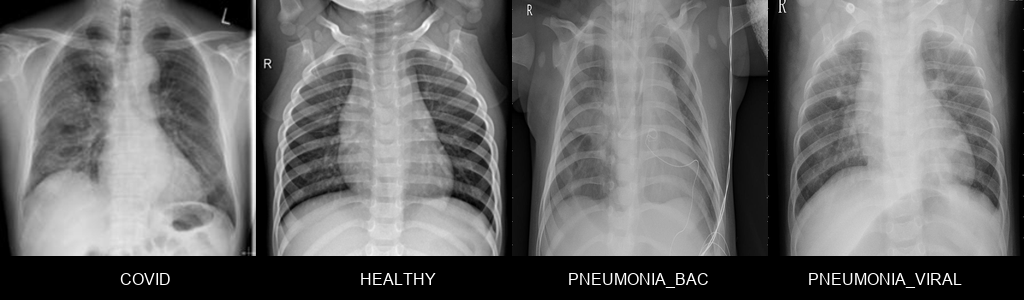

In [98]:
from PIL import Image
from PIL import ImageFont, ImageDraw, ImageOps

def plot_samples(sample_files):
    x, y = 0, 0
    font_size = 16
    # Size of individual images
    img_size = 256
    # Final Image size
    width = img_size*4
    height = 300
    
    img = Image.new(mode="L", size=(width, height), color=0)
    font = ImageFont.truetype("arial.ttf", font_size)
    draw = ImageDraw.Draw(img)
    
    # Iterate samples
    for file in sample_files:
        # Get image file as PIL Object
        copy_img = Image.open(f"sample_set/{file[0]}/{file[1]}")
        # Paste into final img
        img.paste(copy_img, (x, y))
        # Calculate size of the label
        word_pxl_size = ((len(file[0][:-4]))*font_size)/2
        # Calculate position of the text label relative to the image (aka how to center a div)
        text_position = x + img_size/2 - word_pxl_size
        # Actually draw the text
        draw.text((text_position, 270), file[0], fill='white', font=font)
        # Increase x coordinate before pasting new image
        x += img_size
    
    # Display image in jupyter
    display(img)
    # Save image file
    img.save('lung_sample.png')

import os
from random import randrange

sample_files = []
# Read folders from sample_data (COVID, HEALTHY, PNEUMONIA_BAC, PNEUMONIA_VIRAL)
for img_category in os.listdir("sample_set/"):
    # Get images from folder
    image_files = os.listdir(f"sample_set/{img_category}/")
    # Select random image file
    image_file = image_files[randrange(len(image_files))]
    # Save image path and category
    sample_files.append([img_category, image_file])

# Generate Sample Images from Data Sample
plot_samples(sample_files)
